# Computer vision - Laboratory

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics are:

1)	Segmentation of video shots with static scenes.

2) Background substraction.

3)	Segmentation of images.

In order to successfuly complete this practicum it is necessary to understand the following theory concepts: background substraction, K-means clustering, etc.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.

## 3.1 Background substraction methods


Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, remove all the "artifacts" considered as foreground related to movement extracting the background images.

Note: One of the applications of these methods is the button "remove tourists" implemented in most commercial photo cameras. For instance, Adobe uses the "Monument Mode", which automatically deletes the people going by the cameras.

Read and visualize the sequence of images "images/Barcelona-sequence"
Hint: In order to read a  collection of images, we wil use the function animation.FuncAnimation [https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html].

Observe in the following example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

<IPython.core.display.Javascript object>


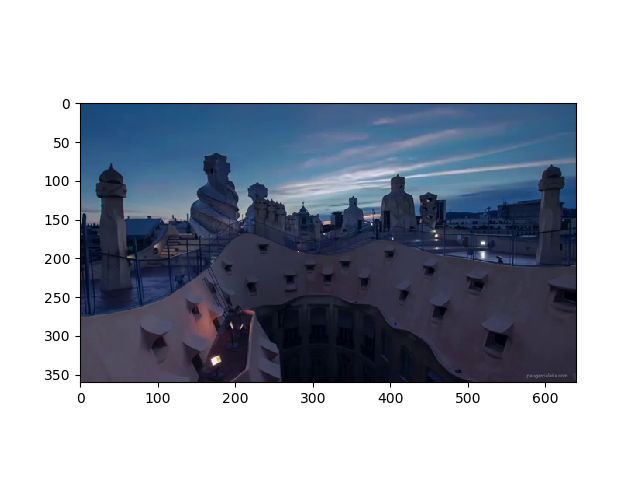

<IPython.core.display.Javascript object>


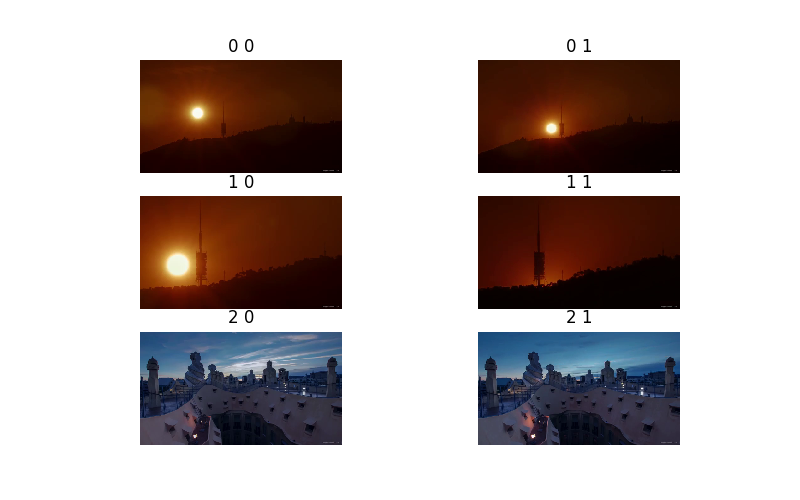

In [116]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray

inicio_primer_escena = np.zeros((360,640,3),dtype="float")
final_primer_escena = np.zeros((360,640,3),dtype="float")

inicio_segunda_escena = np.zeros((360,640,3),dtype="uint8")
final_segunda_escena = np.zeros((360,640,3),dtype="uint8")

inicio_tercera_escena = np.zeros((360,640,3),dtype="uint8")
final_tercera_escena = np.zeros((360,640,3),dtype="uint8")

ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder
scene=1
import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image

def updatefig1(i):   #Updating the frame visualization
    im.set_array(ic[i*5]) #Changing the content of the canvas
    return im, #to return a tuple!

ani = animation.FuncAnimation(fig, updatefig1, interval=5, blit=False, frames=50, repeat= False)
scene=1
i=1


for i in range (285):
    hist0 = exposure.histogram(rgb2gray(ic[i]),nbins=256)
    hist1 = exposure.histogram(rgb2gray(ic[i+1]),nbins=256)
    suma=0
    suma1=0
    j=1
    for j in range (256):
        suma=hist0[0][j]*j+suma
        suma1=hist1[0][j]*j+suma1   
    suma=suma/(256*256)
    suma1=suma1/(256*256)
  
    if abs(suma1-suma)>50:
        if scene==1:
            final_primer_escena = ic[i]
            inicio_segunda_escena = ic[i+1]
            scene=scene+1
        elif scene ==2:
            final_segunda_escena = ic[i]
            inicio_tercera_escena = ic[i+1]
            scene=scene+1
    
    
inicio_primer_escena = ic[0]
final_tercera_escena = ic[286]
   
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,5))

axes[0][0].imshow(inicio_primer_escena)
axes[0][0].axis("off")
axes[0][0].set_title("0 0")


axes[1][0].imshow(inicio_segunda_escena,cmap="gray")
axes[1][0].axis("off")
axes[1][0].set_title("1 0")

axes[2][0].imshow(inicio_tercera_escena)
axes[2][0].axis("off")
axes[2][0].set_title("2 0")

axes[0][1].imshow(final_primer_escena,cmap="gray")
axes[0][1].axis("off")
axes[0][1].set_title("0 1")

axes[1][1].imshow(final_segunda_escena)
axes[1][1].axis("off")
axes[1][1].set_title("1 1")

axes[2][1].imshow(final_tercera_escena)
axes[2][1].axis("off")
axes[2][1].set_title("2 1")

plt.show()    
    
    

    
    




a) Find where a shot (scene) finishes and the following starts (boundaries). Each of the scenes in a video is usually called 'shot'. Which measure can be used in order to visually distinguish the shots in a plot? Explain your solution.

Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">

**Hint:** take the following example of video and temporal plot visualization as a template. The plot must be replaced by a frame by frame measure to be defined by you, being applicable to distinguish the shots.

- If you need to convert the image to float, the command is: img_as_float()
- If you need the histogram, it is in skimage.exposure

In [ ]:
# Example
# Sinusoidal plot points generation
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt+=1
        t += 0.05
        y = np.cos(2*np.pi*t) * np.exp(-t/10.)
        # adapted the data generator to yield both sin and cos
        yield t, y

data_gen.t = 0

%matplotlib nbagg

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(-1.1, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# initialize the data arrays 
xdata, ydata = [], []
def run(data):
    # update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
            
    # update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
plt.show()

## 3.2 Background substraction

Apply the background substraction algorithm (check theory material).

Visualize, for each shot of the video:
    1) images belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

<IPython.core.display.Javascript object>


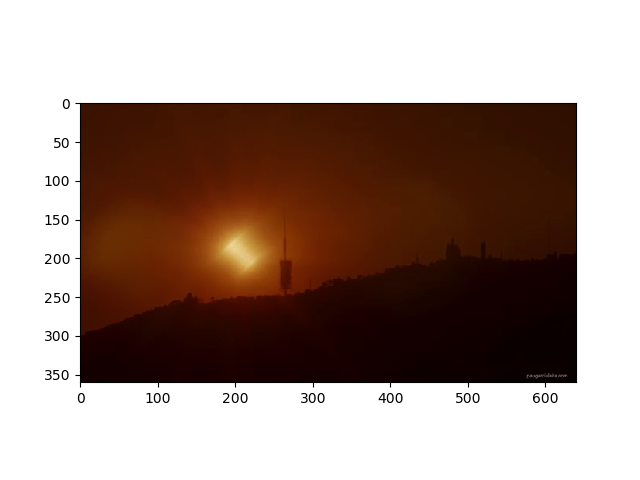

/////
(360, 640, 3)
[[[57 20  1]
  [57 20  1]
  [57 20  1]
  ..., 
  [47 15  1]
  [47 15  1]
  [47 15  1]]

 [[57 20  1]
  [57 20  1]
  [57 20  1]
  ..., 
  [47 15  1]
  [47 15  1]
  [47 15  1]]

 [[57 19  1]
  [57 19  1]
  [57 19  1]
  ..., 
  [47 15  1]
  [47 15  1]
  [47 15  1]]

 ..., 
 [[18  0  0]
  [18  0  0]
  [18  0  0]
  ..., 
  [ 9  0  0]
  [ 9  0  0]
  [ 9  0  0]]

 [[18  0  0]
  [18  0  0]
  [18  0  0]
  ..., 
  [ 9  0  0]
  [ 9  0  0]
  [ 9  0  0]]

 [[18  0  0]
  [18  0  0]
  [18  0  0]
  ..., 
  [ 9  0  0]
  [ 9  0  0]
  [ 9  0  0]]]


In [84]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray


ic = io.ImageCollection('images/Barcelona-sequence/*.png')
        # Reading a sequence of images from a folder
scene=1
import matplotlib.animation as animation
%matplotlib nbagg 
    #Changing the pluggin is necessary always when visualizing a video!

i=0       #Inicializing the video display
fig = plt.figure()  # Create figure
im = plt.imshow(ic[i], animated=True) #Visualize the first image


scene=1
i=1


print(ic[0].shape)
    
red_sun=np.zeros((360,640,103),dtype="uint8")
green_sun=np.zeros((360,640,103),dtype="uint8")
blue_sun=np.zeros((360,640,103),dtype="uint8")
sun_back = np.zeros((360,640,3),dtype="uint8")

for i in range(103):
    for j in range(360):
        for h in range(640):
            red_sun[j][h][i]=ic[i][j][h][0]
            green_sun[j][h][i]=ic[i][j][h][1]
            blue_sun[j][h][i]=ic[i][j][h][2]

for i in range(360):
    for j in range(640):
        sun_back[i][j][0]=np.median(red_sun[i][j])
        sun_back[i][j][1]=np.median(green_sun[i][j])
        sun_back[i][j][2]=np.median(blue_sun[i][j])

plt.imshow(sun_back)
plt.show()
        


   

Comment your implementation including details. What happens if the shots are not correctly extracted? What happens if you find too many shots in the video? What do the static background images represent? In which situations does the algorithm work and in which it does not? What happens if you substract the background image from the original one?

Do you see any additional application for this algorithm?

**[OPTIONAL]**
Apply the algorithm to some other static video that you found.

## 3.3 Clustering methods on the RGB-XY space

a) Read any image from the folder 'images' and segment it using Felzenszwalbs's method. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Which are the optimal values? Comment what algorithm is the method based in up to 3 lines most.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline)
- Add title to the figures to explain what is displayed.

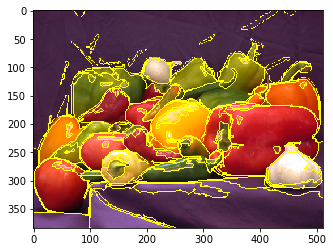

In [13]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float
from skimage.color import rgb2gray
from skimage.segmentation import felzenszwalb, mark_boundaries


im_peppers = io.imread("images/peppers.png")
segments = felzenszwalb(im_peppers, scale=200, sigma=0.5, min_size=50)

plt.imshow(mark_boundaries(im_peppers, segments))
plt.show()
#The parameter scale sets an observation level.Higher scale means less and larger segments.
#sigma is the diameter of a Gaussian kernel, used for smoothing the image
#there aren't optimal values, it depends of the image and what do you want of it


b) Segment the previous image using SLIC algorithm. Test different parameters in order to obtain a good image segmentation. How does each parameter behave? Upt o your opinion, which are the optimal values? Comment what algorithm is the method based in up to 3 lines.

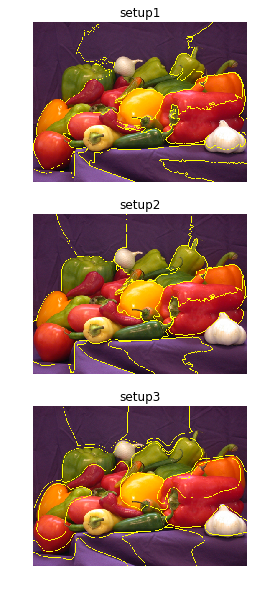

In [47]:
from skimage.segmentation import slic
segments_slic = slic(im_peppers,n_segments=20,compactness=0.1,sigma=1)
segments_slic2 = slic(im_peppers,n_segments=20,compactness=10,sigma=1)
segments_slic3 = slic(im_peppers,n_segments=20,compactness=10,sigma=10)

f, axx = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

axx[0].imshow(mark_boundaries(im_peppers,segments_slic))
axx[0].axis("off")
axx[0].set_title("setup1")


axx[1].imshow(mark_boundaries(im_peppers,segments_slic2))
axx[1].axis("off")
axx[1].set_title("setup2")

axx[2].imshow(mark_boundaries(im_peppers,segments_slic3))
axx[2].axis("off")
axx[2].set_title("setup3")

#creo que en el setup 3 se encuentran, mejor que en los otros dos, los componentes de la foto

plt.show()



c) Plot the original image and the results of both algorithms in a 1x3 subplot. Calculate also the number of segments obtained on the image by each of the algorithms. Comment the differences between each method as well as their advantages and disadvantages.

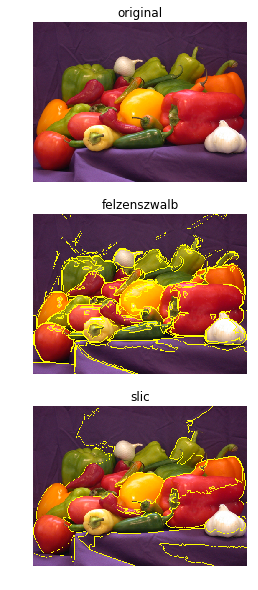

In [28]:
f, axis = plt.subplots(nrows=3, ncols=1, figsize=(20,10))

axis[0].imshow(im_peppers)
axis[0].axis("off")
axis[0].set_title("original")


axis[1].imshow(mark_boundaries(im_peppers, segments))
axis[1].axis("off")
axis[1].set_title("felzenszwalb")

axis[2].imshow(mark_boundaries(im_peppers, segments_slic))
axis[2].axis("off")
axis[2].set_title("slic")

plt.show()

